In [1]:
import numpy as np
import pickle
from classes.behaviour_analysis import *
from classes.plotting_behavior import *
from classes.network_2areas import *
from classes.tasks import *
from scipy.signal import savgol_filter
import pickle
import matplotlib.pyplot as plt
from classes.behaviour_analysis import *

In [2]:
#file_la = 'cluster_plots/choosen_sessions/line_attractor/data_amp_ff_0.00500_amp_rpe_0.02500_std_0.03000.p'

file_la = 'cluster_plots/choosen_sessions/line_attractor/data_amp_ff_0.00300_amp_rpe_0.30000_std_0.02000.p'
data_la = pickle.load(open(file_la, 'rb'))
trials_per_prob  = np.array(data_la['rewards']).shape[2]
rewarded_trials_l =  np.array(data_la['rewards'])[:,0,:].flatten()== 1
rewarded_trials_r =  np.array(data_la['rewards'])[:,1,:].flatten()== 1
unrewarded_trials_l =  (np.array(data_la['rewards'])[:,0,:].flatten()== 0) & np.array(data_la['choices'])[:, 0, :].flatten()==1
unrewarded_trials_r =  (np.array(data_la['rewards'])[:,1,:].flatten()== 0) & np.array(data_la['choices'])[:, 1, :].flatten()==1
choice_history = np.array(data_la['choices'])[:, 0, :].flatten() -np.array(data_la['choices'])[:, 1, :].flatten() 

trial_start = 50
n_trials = 1000-trial_start#unrewarded_trials_l.shape[0]
rewarded_trials_l_ch = rewarded_trials_l[trial_start:1000]
rewarded_trials_r_ch = rewarded_trials_r[trial_start:1000]
unrewarded_trials_l_ch =  unrewarded_trials_l[trial_start:1000]
unrewarded_trials_r_ch =  unrewarded_trials_r[trial_start:1000]
choice_history_ch = choice_history[trial_start:1000]

p_ch, p_rw = causal_smoothing(data_la['choices'], data_la['rewards'])

overlaps = np.array(data_la['overlaps']).reshape(1000, 2)
rates_pfc = np.array(data_la['rates_pfc']).reshape(1000, 1000)
reaction_times = np.array(data_la['reaction_times']).reshape(1000, 1)
rates_ww = np.array(data_la['rates_ww']).reshape(1000, 2)

/Users/ulises/Documents/2023/foraging-integrator-vs-synaptic/Fig2/classes/behaviour_analysis.py:28: RuntimeWarning: invalid value encountered in divide
  p_ch_smooth = ch_smooth[0,:]/(ch_smooth[0,:]+ch_smooth[1,:])


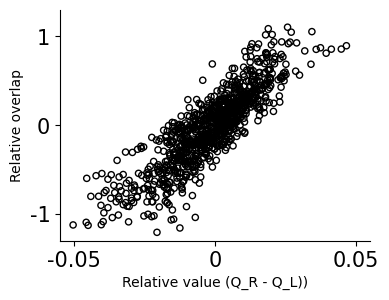

In [3]:
q_stim = pickle.load(open('cluster_plots/choosen_sessions/line_attractor/q_estimated.p','rb'))
dq = q_stim[1]-q_stim[0]
doverlaps = overlaps[:,1]-overlaps[:,0]
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(dq[trial_start:1000], doverlaps[trial_start:1000], marker='o',  facecolor = 'None', edgecolor = 'k', s=20)
ax.set_xlim([-0.055, 0.055])
ax.set_xticks([-0.05, 0, 0.05])
ax.set_xticklabels([-0.05, 0, 0.05], fontsize=15)
ax.set_xlabel('Relative value (Q_R - Q_L))')
ax.set_ylabel('Relative overlap')
ax.set_ylim([-1.3, 1.3])
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels([-1, 0, 1], fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figures/line_attractor/overlap_vs_q.pdf', bbox_inches='tight')




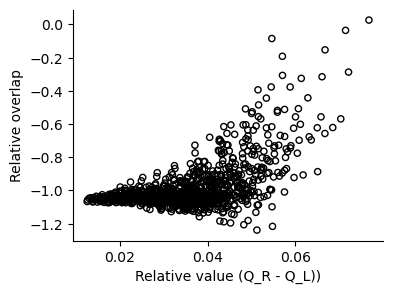

In [4]:
q_stim = pickle.load(open('cluster_plots/choosen_sessions/line_attractor/q_estimated.p','rb'))
Sq = q_stim[1]+q_stim[0]
Soverlaps = overlaps[:,1]+overlaps[:,0]
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(Sq[trial_start:1000], Soverlaps[trial_start:1000], marker='o',  facecolor = 'None', edgecolor = 'k', s=20)
#ax.set_xlim([-0.1, 0.1])
#ax.set_xticks([-0.1, 0, 0.1])
#ax.set_xticklabels([-0.1, 0, 0.1], fontsize=15)
ax.set_xlabel('Relative value (Q_R - Q_L))')
ax.set_ylabel('Relative overlap')
#ax.set_ylim([-1.3, 1.3])
#ax.set_yticks([-1, 0, 1])
#ax.set_yticklabels([-1, 0, 1], fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figures/line_attractor/sum_overlap_vs_sum_q.pdf', bbox_inches='tight')



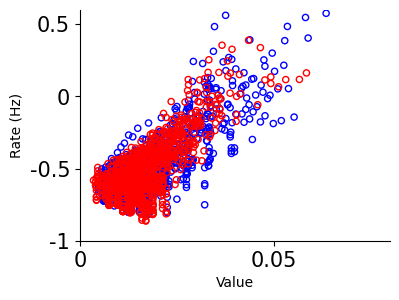

In [5]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(q_stim[0][trial_start:1000],overlaps[trial_start:1000,0], marker='o',  facecolor = 'None', edgecolor = 'b', s=20)
ax.scatter(q_stim[1][trial_start:1000],overlaps[trial_start:1000,1], marker='o',  facecolor = 'None', edgecolor = 'r', s=20)
#ax.scatter(dq[trial_start:1000], doverlaps[trial_start:1000], marker='o',  facecolor = 'None', edgecolor = 'k', s=20)
ax.set_xlim([0, .08])
ax.set_xticks([0, .05])
ax.set_xticklabels([0, .05], fontsize=15)
#ax.set_xticklabels([0, .05, .1], fontsize=15)
#ax.set_xticks([-0.08, 0, 0.08])
#ax.set_xticklabels([-0.08, 0, 0.08], fontsize=15)
ax.set_xlabel('Value')
ax.set_ylabel('Rate (Hz)')
ax.set_ylim([-1, .6])
ax.set_yticks([-1,-0.5, 0, 0.5])
ax.set_yticklabels([-1,-0.5, 0, 0.5], fontsize=15)
#ax.set_yticks([0, .3, .6])
#ax.set_yticklabels([0, .3, .6], fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figures/line_attractor/fig_overlap_vs_sum_value.pdf', bbox_inches='tight', transparent = True)
#ax.set_xlim([-.2, .5])

In [6]:
baiting_probs = [[0.225,0.225], [.4,.05], [.05,.4 ], [.225,.225], [.3857, .0643], [.0643, .3857], [.225,.225], [.3375, .1125], [.1125,.3375], [.225,.225]]   
baiting_probs = np.array(baiting_probs)  
prob_reward_fraction = baiting_probs/np.sum(baiting_probs, axis = 1)[:, None]

p_reward_fraction = np.array([prob_reward_fraction[i,0] * np.ones(trials_per_prob) for i in range(prob_reward_fraction.shape[0])]).flatten()

In [7]:

dt = 0.1
period = 3000
modelparams = dict(
    seed = 3, #random seed connectivity
    dt = dt, #integration time
    c = 1, # dilution 
    p = 2, # number of patterns
    amp_ff = 0.00025,#.01,#0.6,# strenght of the feedforward weights
    #line attrctor
    N_pfc = 1000,
    g = 0.5,
    dim = 2, #dim line attractor
    sigma_noise_pfc = 0.005,
    tau_noise_pfc = 1,
    epsilon = 0, # decay line attractor
    amp_rpe = .1,
    
    #parameter task
    period = period, # period simulations [ms] 
    t_start = 0.,#start stim
    t_stop = 300, #end stim
    t_go = 1000, #end stim
    T_rpe = 100, #end stim
    thres = 30, #threshold for choice
    tau_reward = 5., #time-scale 10 trials
   
    #beta choice
    beta = 0.1,

    
)

params_ww = dict(
        dt = dt * 1e-3,
        # Wong&Wang model
        A_t = 270., #Hz/nA
        B_t = 108., #Hz
        D_t = 0.154, #s
        tau_nmda = 100 * 1e-3, #s
        gamma = 0.641,
        i_0 = 0.3225 +0.0156, #nA
        i_iti = -0.15, # current ITI
        tau_ampa = 2. * 1e-3, #ms
        sig_ampa = 0.04,#8#nA amplitude noise
        w_a_a = 0.2609,
        w_b_b = 0.2609,
        w_iti = 0.1,
        j_a_b = 0.0497,
        j_b_a = 0.0497,
        
        #stimulation choice
        t_stim = 100,
        period_stim = 50,
        amp = np.array([0, 0]),
        t_max = 300, # max time afte go cue to respond
        period = period # period simulations [ms] 

        
        )

task = foraging_task(modelparams)
dyn = NetworkDynamics(modelparams, params_ww, task)

index_pat_1 = np.argsort(dyn.la.null[0])
index_pat_2 = np.argsort(dyn.la.null[1])

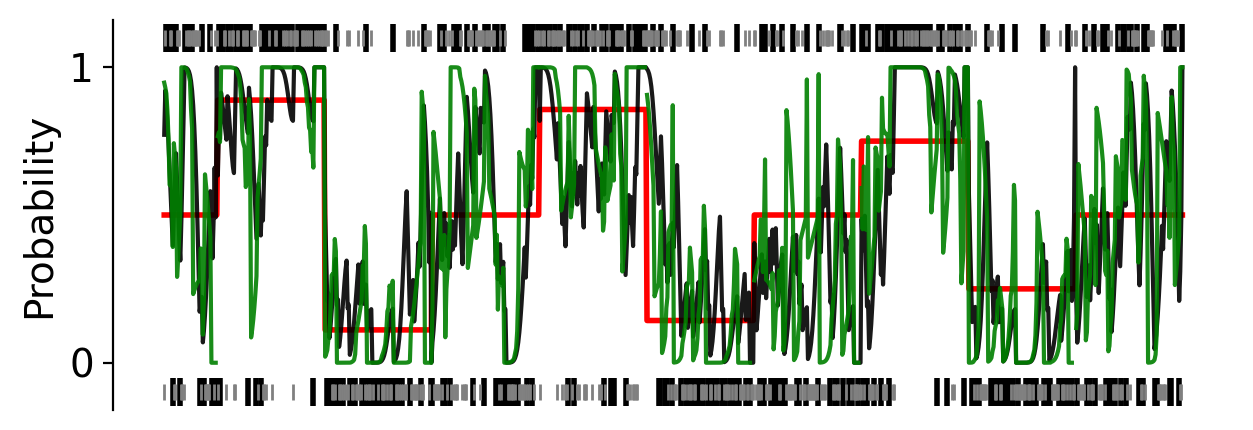

In [8]:
base_color='r'
fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.05, top=0.7)
ax.plot(np.nonzero(rewarded_trials_l_ch)[0], choice_history_ch[rewarded_trials_l_ch] + .1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(rewarded_trials_r_ch)[0], (choice_history_ch[rewarded_trials_r_ch] + 1)-.1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(unrewarded_trials_l_ch)[0], (choice_history_ch[unrewarded_trials_l_ch] + 1)/2 + .1,'|', color='gray', markersize=6, markeredgewidth=1)
ax.plot(np.nonzero(unrewarded_trials_r_ch)[0], (choice_history_ch[unrewarded_trials_r_ch] +1)/2 -.1,'|', color='gray', markersize=6, markeredgewidth=1)

ax.plot(np.arange(0, n_trials), p_reward_fraction[trial_start:1000], color=base_color, label='base rew. prob.', lw=2)
ax.plot(np.arange(0, n_trials), p_ch[trial_start:1000], color='k', label='base rew. prob.', lw=1.5, alpha = .9)
ax.plot(np.arange(0, n_trials), p_rw[trial_start:1000], color='g', label='base rew. prob.', lw=1.5, alpha = .9)
#smooth_factor = 5
# Smoothed choice history
#y = moving_average((choice_history + 1)/2., n = smooth_factor)
#x = np.arange(0, len(y)) + int(smooth_factor / 2)
#ax.plot(x, y, linewidth=1.5, color='black', label='choice (smooth = %g)' % smooth_factor)
ax.set_xticks([])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1], fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)



plt.savefig('figures/line_attractor/fig_choice_history.pdf', bbox_inches='tight', transparent = True)

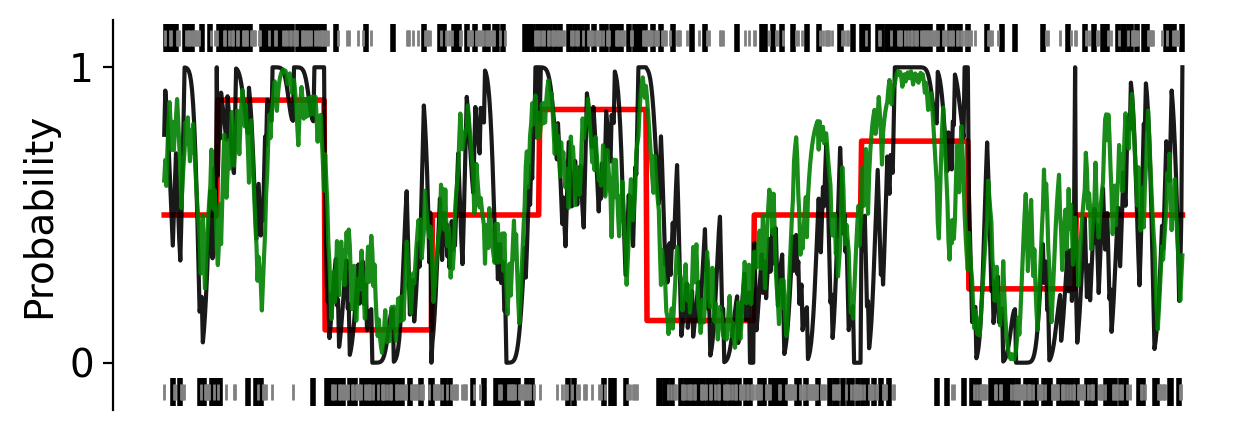

In [24]:

pred_choice_Q = pickle.load(open('cluster_plots/choosen_sessions/line_attractor/fitting_results.p','rb'))
base_color='r'
fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.05, top=0.7)
ax.plot(np.nonzero(rewarded_trials_l_ch)[0], choice_history_ch[rewarded_trials_l_ch] + .1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(rewarded_trials_r_ch)[0], (choice_history_ch[rewarded_trials_r_ch] + 1)-.1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(unrewarded_trials_l_ch)[0], (choice_history_ch[unrewarded_trials_l_ch] + 1)/2 + .1,'|', color='gray', markersize=6, markeredgewidth=1)
ax.plot(np.nonzero(unrewarded_trials_r_ch)[0], (choice_history_ch[unrewarded_trials_r_ch] +1)/2 -.1,'|', color='gray', markersize=6, markeredgewidth=1)

ax.plot(np.arange(0, n_trials), p_reward_fraction[trial_start:1000], color=base_color, label='base rew. prob.', lw=2)
ax.plot(np.arange(0, n_trials), p_ch[trial_start:1000], color='k', label='base rew. prob.', lw=1.5, alpha = .9)
ax.plot(np.arange(0, n_trials), pred_choice_Q[0,trial_start:1000], color='g', label='base rew. prob.', lw=1.5, alpha = .9)
#smooth_factor = 5
# Smoothed choice history
#y = moving_average((choice_history + 1)/2., n = smooth_factor)
#x = np.arange(0, len(y)) + int(smooth_factor / 2)
#ax.plot(x, y, linewidth=1.5, color='black', label='choice (smooth = %g)' % smooth_factor)
ax.set_xticks([])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1], fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('figures/line_attractor/fig_choice_history_Q_learning.pdf', bbox_inches='tight', transparent = True)

[Text(1, 0.0, '-1'), Text(1, 0.5, '0'), Text(1, 1.0, '1')]

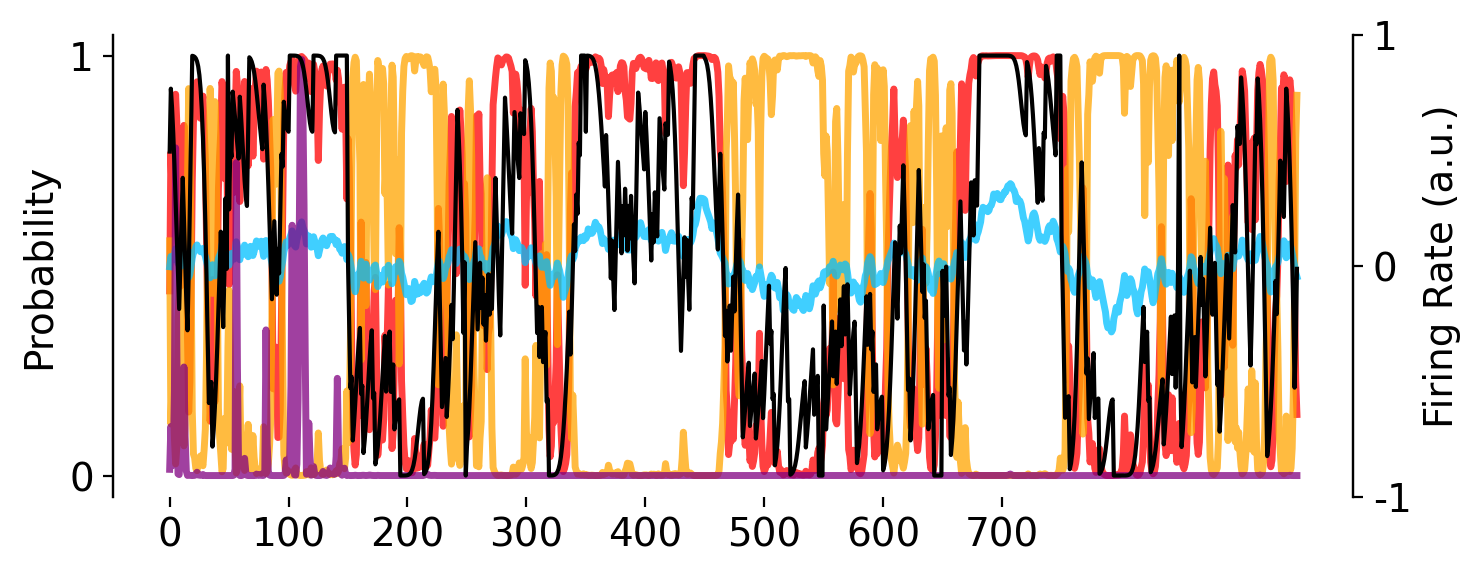

In [57]:
#320, 322, 488,492, 496, 497,498, 503, 507, 508, 511, 5016
ind = 503
ind1 = index_pat_1[ind]
ind2 = index_pat_2[ind]

fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)

alpha = .75

#ax.plot((rates_pfc[:,ind1]+1)/2)
ax.plot((rates_pfc[trial_start:-1,ind2]+1)/2, color = 'r', alpha = alpha, lw = 2.5)
ax.plot((rates_pfc[trial_start:-1,ind1]+1)/2, color = 'orange', alpha = alpha, lw =2.5)
ax.plot((rates_pfc[trial_start:-1,5]+1)/2, color = 'deepskyblue', alpha = alpha, lw =2.5)
ax.plot((rates_pfc[trial_start:-1,7]+1)/2, color = 'purple', alpha = alpha, lw =2.5)
#ax.plot((rates_pfc[trial_start:-1,11]+1)/2, color = 'purple', alpha = .5, lw =2)
#ax.plot(p_ch)
ax.plot(p_ch[trial_start:-1], 'k', lw = 1.5)

ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1], fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([0, 100, 200, 300, 400, 500, 600, 700])
ax.set_xticklabels([0, 100, 200, 300, 400, 500, 600, 700], fontsize=14)
ax2 = ax.twinx()

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_ylabel('Firing Rate (a.u.)', fontsize=14)
ax2.set_yticks([0, .5, 1.])
ax2.set_yticklabels([-1, 0, 1], fontsize=14)

#plt.savefig('figures/paper/fig4/firing_rates_vs_choice.pdf', bbox_inches='tight', transparent = True)

#plt.plot(reaction_times[:,0]/np.max(reaction_times[:,0]))


[Text(0, 0.0, '0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1')]

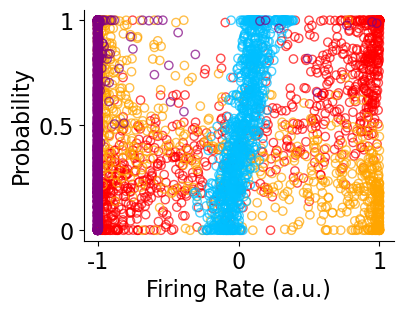

In [58]:

alpha = .7
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter((rates_pfc[trial_start:-1,ind2]), p_ch[trial_start:-1], facecolor = 'None', edgecolor = 'r', alpha = alpha)
ax.scatter((rates_pfc[trial_start:-1,ind1]), p_ch[trial_start:-1],facecolor = 'None', edgecolor = 'orange', alpha = alpha)
ax.scatter((rates_pfc[trial_start:-1,5]), p_ch[trial_start:-1], facecolor = 'None', edgecolor = 'deepskyblue', alpha = alpha)
ax.scatter((rates_pfc[trial_start:-1,7]), p_ch[trial_start:-1], facecolor = 'None', edgecolor = 'purple', alpha = alpha)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Firing Rate (a.u.)', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)

ax.set_xticks([-1, 0, 1.])
ax.set_xticklabels([-1, 0, 1], fontsize = 16)
ax.set_yticks([0, .5, 1.])
ax.set_yticklabels([0, .5, 1], fontsize = 16)

#plt.savefig('figures/paper/fig4/firing_rates_vs_probchoice.pdf', bbox_inches='tight', transparent = True)

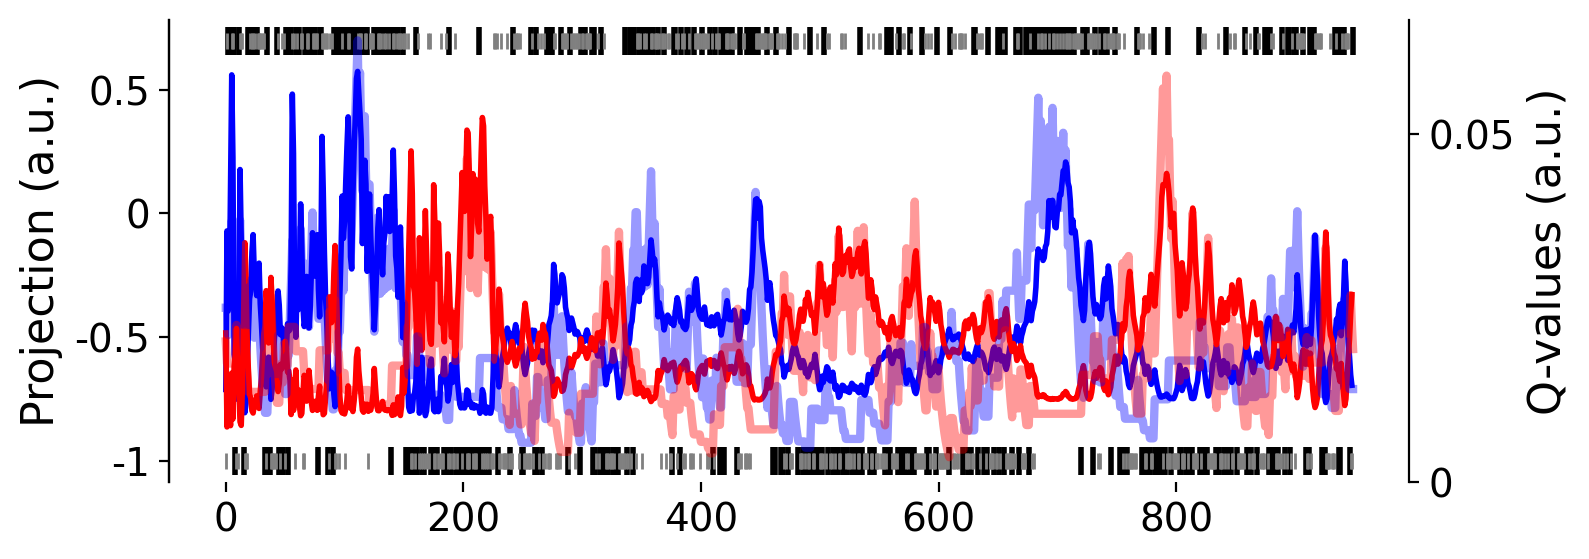

In [57]:

#320, 322, 488,492, 496, 497,498, 503, 507, 508, 511, 5016
ind = 300
ind1 = index_pat_1[ind]
ind2 = index_pat_2[ind]

fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)
#ax.plot(p_rw[trial_start:-1], 'g', lw = 1.5)
a_ticks = .6
b_ticks = 1
ax.plot(np.nonzero(rewarded_trials_l_ch)[0], a_ticks * choice_history_ch[rewarded_trials_l_ch] + .1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(rewarded_trials_r_ch)[0], b_ticks * (choice_history_ch[rewarded_trials_r_ch] + 1)-1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(unrewarded_trials_l_ch)[0], a_ticks * (choice_history_ch[unrewarded_trials_l_ch] + 1)/2 + .1,'|', color='gray', markersize=6, markeredgewidth=1)
ax.plot(np.nonzero(unrewarded_trials_r_ch)[0], b_ticks * (choice_history_ch[unrewarded_trials_r_ch] +1)/2 -1,'|', color='gray', markersize=6, markeredgewidth=1)



ax.set_xticks([])

#ax.set_ylabel('Probability', fontsize=14)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax2 = ax.twinx()

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.plot(q_stim[0][trial_start:-1], color = 'b', lw = 3, alpha = .4)
ax2.plot(q_stim[1][trial_start:-1], color = 'r', lw = 3, alpha = .4)
ax2.set_ylabel('Q-values (a.u.)', fontsize=16)
ax2.set_yticks([0,0.05])
ax2.set_yticklabels([0, 0.05], fontsize=14)
ax.spines['right'].set_visible(False)

ax.plot(overlaps[trial_start:-1,0], color = 'b', lw = 2)
ax.plot(overlaps[trial_start:-1,1], color = 'r', lw = 2)
ax.set_yticks([-1, -0.5, 0, 0.5])
ax.set_yticklabels([-1, -0.5 ,0, 0.5], fontsize=14)
ax.set_ylabel('Projection (a.u.)', fontsize=16)
ax.set_xticks([0, 200, 400, 600, 800])
ax.set_xticklabels([0, 200, 400, 600, 800], fontsize=14)
#ax2.set_yticks([-10, -15, -20])
#ax2.set_yticklabels([-10, -15, -20], fontsize=14)
#plt.savefig('figures/paper/fig4/overlap_vs_choice.pdf', bbox_inches='tight', transparent = True)
#ax.plot(p_rw[ind:-1])
plt.savefig('figures/line_attractor/overlap_vs_choice.pdf', bbox_inches='tight', transparent = True)

[Text(0, 0.0, '0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1')]

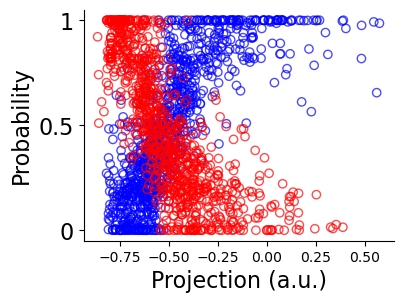

In [50]:

alpha = .7
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(overlaps[trial_start:-1,0], p_ch[trial_start:-1], facecolor = 'None', edgecolor = 'b', alpha = alpha)
ax.scatter(overlaps[trial_start:-1,1], p_ch[trial_start:-1],facecolor = 'None', edgecolor = 'r', alpha = alpha)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Projection (a.u.)', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)

#ax.set_xticks([-20, -15, -10])
#ax.set_xticklabels([-20, -15, -10], fontsize = 16)
ax.set_yticks([0, .5, 1.])
ax.set_yticklabels([0, .5, 1], fontsize = 16)

#plt.savefig('figures/paper/fig4/overlaps_vs_probchoice.pdf', bbox_inches='tight', transparent = True)

[Text(0, 0.0, '0'), Text(0, 1.0, '1'), Text(0, 2.0, '2')]

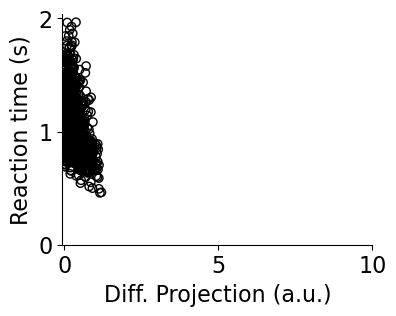

In [53]:

ind = 500
max_ov_sum = np.max(np.abs(overlaps[:, 0] + overlaps[:, 1]))
ovs_diff = np.abs(overlaps[trial_start:1000, 0] - overlaps[trial_start:1000, 1])


fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(ovs_diff, reaction_times[trial_start:1000,0] * .001, facecolor = 'None', edgecolor = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Diff. Projection (a.u.)', fontsize=16)
ax.set_ylabel('Reaction time (s)', fontsize=16)
ax.set_xticks([0, 5, 10])
ax.set_xticklabels([0, 5, 10], fontsize = 16)
ax.set_yticks([0, 1., 2])
ax.set_yticklabels([0, 1, 2], fontsize = 16)
#plt.savefig('figures/paper/fig4/reaction_time.pdf', bbox_inches='tight', transparent = True)


In [54]:
ind = 503
ind1 = index_pat_1[ind]
ind2 = index_pat_2[ind]
rates_diff = np.abs(rates_pfc[trial_start:1000,ind1] - rates_pfc[trial_start:1000,ind2])

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(rates_pfc[trial_start:1000,ind1], reaction_times[trial_start:1000,0] * .001, facecolor = 'None', edgecolor = 'r')
ax.scatter(rates_pfc[trial_start:1000,ind2], reaction_times[trial_start:1000,0] * .001, facecolor = 'None', edgecolor = 'orange')
ax.scatter(rates_pfc[trial_start:1000,5], reaction_times[trial_start:1000,0] * .001, facecolor = 'None', edgecolor = 'deepskyblue')
ax.scatter(rates_pfc[trial_start:1000,7], reaction_times[trial_start:1000,0] * .001, facecolor = 'None', edgecolor = 'purple')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Firing rate (a.u.)', fontsize=16)
ax.set_ylabel('Reaction time (s)', fontsize=16)
#ax.set_xticks([0, 5, 10])
#ax.set_xticklabels([0, 5, 10], fontsize = 16)
ax.set_yticks([0, 1., 2])
ax.set_yticklabels([0, 1, 2], fontsize = 16)
ax.set_xticks([-1, 0, 1.])
ax.set_xticklabels([-1, 0, 1], fontsize = 16)
#plt.savefig('figures/paper/fig4/reaction_time_vs_firing_rate.pdf', bbox_inches='tight', transparent = True)


NameError: name 'index_pat_1' is not defined

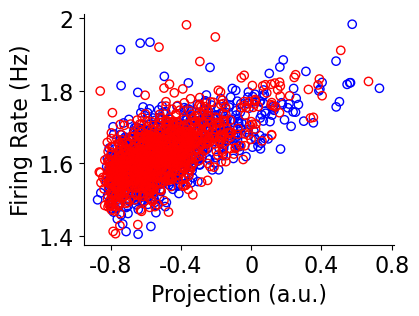

In [113]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)


ax.scatter(overlaps[:, 0], rates_ww[:,0],  facecolor = 'None', edgecolor = 'b')
ax.scatter(overlaps[:, 1], rates_ww[:,1], facecolor = 'None', edgecolor = 'r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Firing Rate (Hz)', fontsize=16)
ax.set_xlabel('Projection (a.u.)', fontsize=16)
ax.set_yticks([1.4, 1.6,  1.8, 2])
ax.set_yticklabels([1.4, 1.6,  1.8, 2], fontsize = 16)
ax.set_xticks([-.8, -0.4, 0,.4, 0.8])
ax.set_xticklabels([-.8, -0.4, 0,.4, 0.8], fontsize = 16)
plt.savefig('figures/line_attractor/overlap_vs_firing_rate_ww.pdf', bbox_inches='tight', transparent = True)


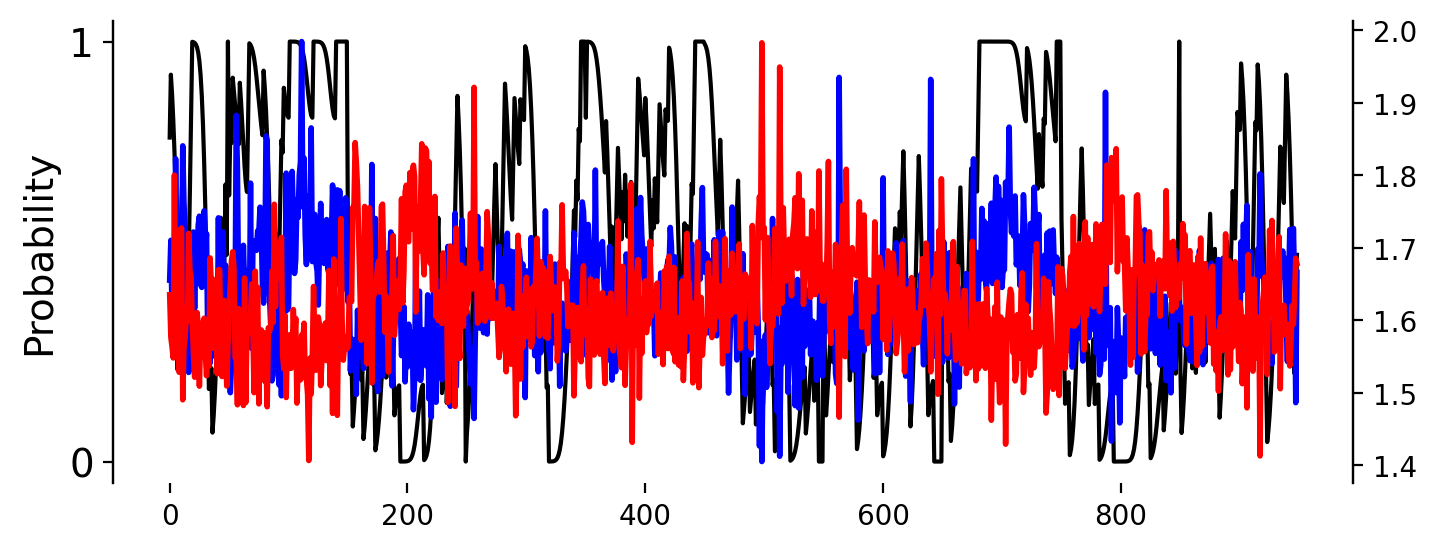

In [66]:
fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)
ax.plot(p_ch[trial_start:-1], 'k', lw = 1.5)
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1], fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax2 = ax.twinx()

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)

ax2.plot(rates_ww[trial_start:-1,0], color = 'b', lw = 2)
ax2.plot(rates_ww[trial_start:-1,1], color = 'r', lw = 2)



In [28]:

#file_syn = 'cluster_plots/choosen_sessions/synaptic/data_amp_ff_0.40000_amp_lr_0.12000_std_0.05000.p'
#file_syn = 'cluster_plots/choosen_sessions/synaptic/data_amp_ff_0.08000_amp_lr_0.08000_std_0.03000.p'
file_syn = 'cluster_plots/choosen_sessions/synaptic/data_amp_ff_0.04000_amp_lr_0.12000_std_0.03000.p'



data_syn = pickle.load(open(file_syn, 'rb'))
trials_per_prob  = np.array(data_syn['rewards']).shape[2]
rewarded_trials_l =  np.array(data_syn['rewards'])[:,0,:].flatten()== 1
rewarded_trials_r =  np.array(data_syn['rewards'])[:,1,:].flatten()== 1
unrewarded_trials_l =  (np.array(data_syn['rewards'])[:,0,:].flatten()== 0) & np.array(data_syn['choices'])[:, 0, :].flatten()==1
unrewarded_trials_r =  (np.array(data_syn['rewards'])[:,1,:].flatten()== 0) & np.array(data_syn['choices'])[:, 1, :].flatten()==1
choice_history = np.array(data_syn['choices'])[:, 0, :].flatten() -np.array(data_syn['choices'])[:, 1, :].flatten() 


trial_start = 50
n_trials = 1000-trial_start#unrewarded_trials_l.shape[0]
rewarded_trials_l_ch = rewarded_trials_l[trial_start:1000]
rewarded_trials_r_ch = rewarded_trials_r[trial_start:1000]
unrewarded_trials_l_ch =  unrewarded_trials_l[trial_start:1000]
unrewarded_trials_r_ch =  unrewarded_trials_r[trial_start:1000]
choice_history_ch = choice_history[trial_start:1000]



p_ch, p_rw = causal_smoothing(data_syn['choices'], data_syn['rewards'])
baiting_probs = [[0.225,0.225], [.4,.05], [.05,.4 ], [.225,.225], [.3857, .0643], [.0643, .3857], [.225,.225], [.3375, .1125], [.1125,.3375], [.225,.225]]   
baiting_probs = np.array(baiting_probs)  
prob_reward_fraction = baiting_probs/np.sum(baiting_probs, axis = 1)[:, None]
p_reward_fraction = np.array([prob_reward_fraction[i,0] * np.ones(trials_per_prob) for i in range(prob_reward_fraction.shape[0])]).flatten()


rates_pfc_syn = np.array(data_syn['rates_pfc']).reshape(1000, 2)
reaction_times_syn = np.array(data_syn['reaction_times']).reshape(1000, 1)
rates_ww_syn = np.array(data_syn['rates_ww']).reshape(1000, 2)

/Users/ulises/Documents/2023/foraging-integrator-vs-synaptic/Fig2/classes/behaviour_analysis.py:28: RuntimeWarning: invalid value encountered in divide
  p_ch_smooth = ch_smooth[0,:]/(ch_smooth[0,:]+ch_smooth[1,:])


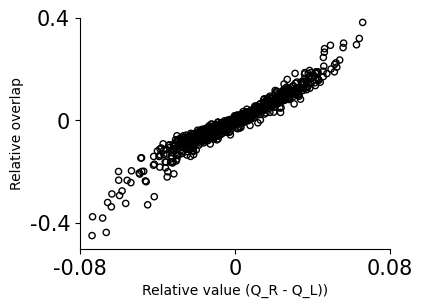

In [36]:
q_stim = pickle.load(open('cluster_plots/choosen_sessions/synaptic/q_estimated_sym3.p','rb'))
dq = q_stim[1]-q_stim[0]
doverlaps = rates_pfc_syn[:,1]-rates_pfc_syn[:,0]
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(dq[trial_start:1000], doverlaps[trial_start:1000], marker='o',  facecolor = 'None', edgecolor = 'k', s=20)
ax.set_xlim([-0.08, 0.08])
ax.set_xticks([-0.08, 0, 0.08])
ax.set_xticklabels([-0.08, 0, 0.08], fontsize=15)
ax.set_xlabel('Relative value (Q_R - Q_L))')
ax.set_ylabel('Relative overlap')
ax.set_ylim([-.5, .4])
ax.set_yticks([-.4, 0, .4])
ax.set_yticklabels([-.4, 0, .4], fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figures/synaptic_model/fig_overlap_vs_value.pdf', bbox_inches='tight', transparent = True)
#ax.set_xlim([-.2, .5])


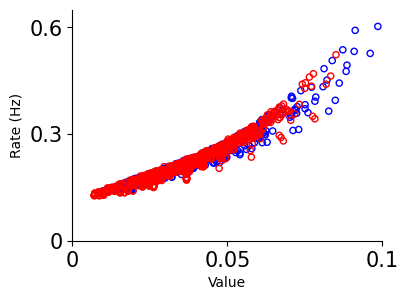

In [37]:
q_stim3 = pickle.load(open('cluster_plots/choosen_sessions/synaptic/q_estimated_sym3.p','rb'))
q_stim2 = pickle.load(open('cluster_plots/choosen_sessions/synaptic/q_estimated_sym2.p','rb'))

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(q_stim3[0][trial_start:1000],rates_pfc_syn[trial_start:1000,0], marker='o',  facecolor = 'None', edgecolor = 'b', s=20)
ax.scatter(q_stim3[1][trial_start:1000],rates_pfc_syn[trial_start:1000,1], marker='o',  facecolor = 'None', edgecolor = 'r', s=20)
#ax.scatter(dq[trial_start:1000], doverlaps[trial_start:1000], marker='o',  facecolor = 'None', edgecolor = 'k', s=20)
ax.set_xlim([0, .1])
ax.set_xticks([0, .05, .1])
ax.set_xticklabels([0, .05, .1], fontsize=15)
#ax.set_xticks([-0.08, 0, 0.08])
#ax.set_xticklabels([-0.08, 0, 0.08], fontsize=15)
ax.set_xlabel('Value')
ax.set_ylabel('Rate (Hz)')
ax.set_ylim([0, .65])
ax.set_yticks([0, .3, .6])
ax.set_yticklabels([0, .3, .6], fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.savefig('figures/synaptic_model/fig_overlap_vs_sum_value.pdf', bbox_inches='tight', transparent = True)
#ax.set_xlim([-.2, .5])

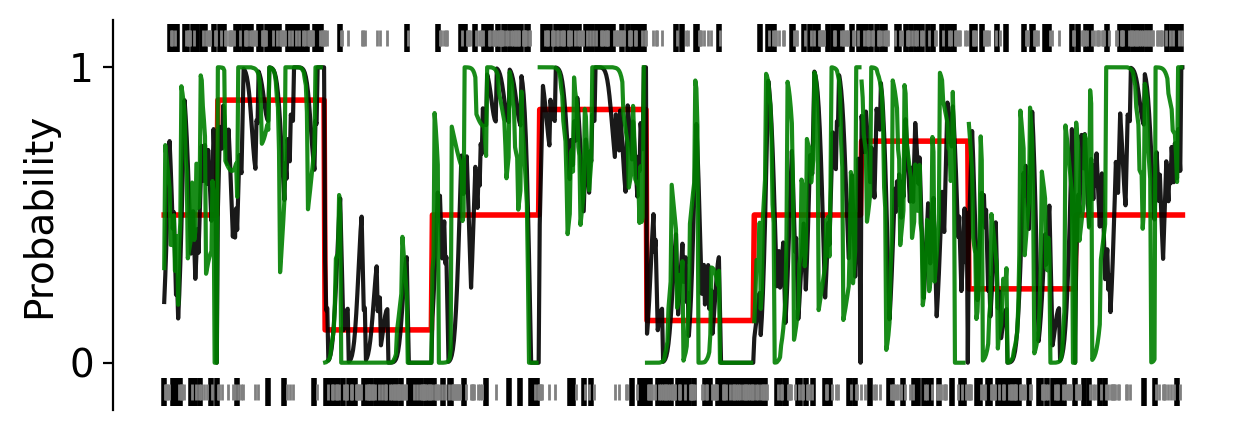

In [6]:
base_color='r'
fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.05, top=0.7)
ax.plot(np.nonzero(rewarded_trials_l_ch)[0], choice_history_ch[rewarded_trials_l_ch] + .1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(rewarded_trials_r_ch)[0], (choice_history_ch[rewarded_trials_r_ch] + 1)-.1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(unrewarded_trials_l_ch)[0], (choice_history_ch[unrewarded_trials_l_ch] + 1)/2 + .1,'|', color='gray', markersize=6, markeredgewidth=1)
ax.plot(np.nonzero(unrewarded_trials_r_ch)[0], (choice_history_ch[unrewarded_trials_r_ch] +1)/2 -.1,'|', color='gray', markersize=6, markeredgewidth=1)

ax.plot(np.arange(0, n_trials), p_reward_fraction[trial_start:1000], color=base_color, label='base rew. prob.', lw=2)
ax.plot(np.arange(0, n_trials), p_ch[trial_start:1000], color='k', label='base rew. prob.', lw=1.5, alpha = .9)
ax.plot(np.arange(0, n_trials), p_rw[trial_start:1000], color='g', label='base rew. prob.', lw=1.5, alpha = .9)
#smooth_factor = 5
# Smoothed choice history
#y = moving_average((choice_history + 1)/2., n = smooth_factor)
#x = np.arange(0, len(y)) + int(smooth_factor / 2)
#ax.plot(x, y, linewidth=1.5, color='black', label='choice (smooth = %g)' % smooth_factor)
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1], fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])

#ax.set_xticks([0, 200, 400, 600, 800])
#ax.set_xticklabels([0, 200, 400, 600, 800], fontsize=14)


plt.savefig('figures/synaptic_model/fig_choice_history.pdf', bbox_inches='tight', transparent = True)

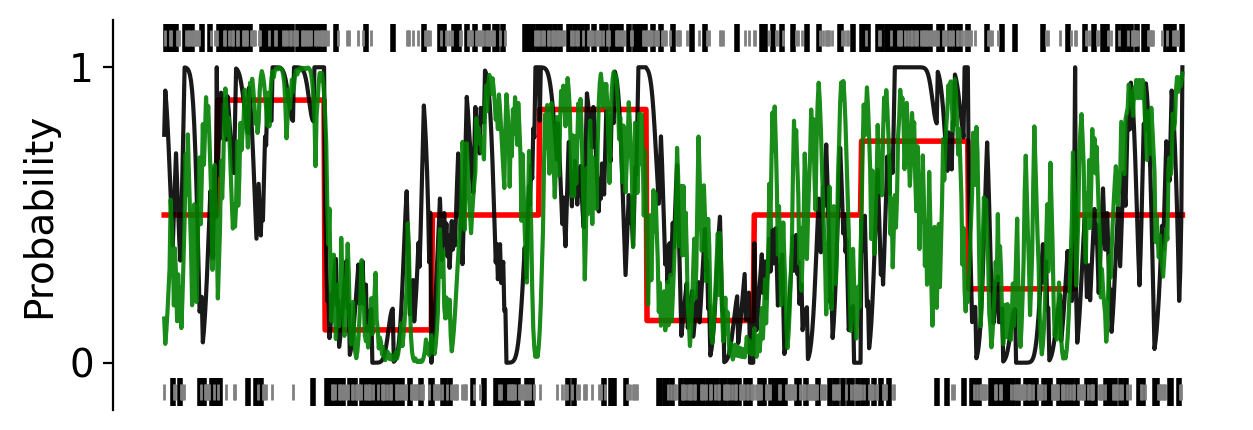

In [30]:
pred_choice_Q = pickle.load(open('cluster_plots/choosen_sessions/synaptic/fitting_results_sym3.p','rb'))
base_color='r'
fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)
fig.subplots_adjust(left=0.1, right=0.8, bottom=0.05, top=0.7)
ax.plot(np.nonzero(rewarded_trials_l_ch)[0], choice_history_ch[rewarded_trials_l_ch] + .1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(rewarded_trials_r_ch)[0], (choice_history_ch[rewarded_trials_r_ch] + 1)-.1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(unrewarded_trials_l_ch)[0], (choice_history_ch[unrewarded_trials_l_ch] + 1)/2 + .1,'|', color='gray', markersize=6, markeredgewidth=1)
ax.plot(np.nonzero(unrewarded_trials_r_ch)[0], (choice_history_ch[unrewarded_trials_r_ch] +1)/2 -.1,'|', color='gray', markersize=6, markeredgewidth=1)

ax.plot(np.arange(0, n_trials), p_reward_fraction[trial_start:1000], color=base_color, label='base rew. prob.', lw=2)
ax.plot(np.arange(0, n_trials), p_ch[trial_start:1000], color='k', label='base rew. prob.', lw=1.5, alpha = .9)
ax.plot(np.arange(0, n_trials), pred_choice_Q[0, trial_start:1000], color='g', label='base rew. prob.', lw=1.5, alpha = .9)
#smooth_factor = 5
# Smoothed choice history
#y = moving_average((choice_history + 1)/2., n = smooth_factor)
#x = np.arange(0, len(y)) + int(smooth_factor / 2)
#ax.plot(x, y, linewidth=1.5, color='black', label='choice (smooth = %g)' % smooth_factor)
ax.set_xticks([])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1], fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.savefig('figures/synaptic_model/fig_choice_history_Q_learning.pdf', bbox_inches='tight', transparent = True)

/var/folders/8j/s45tmjmx3tg9l2_9xnvwv6c80000gp/T/ipykernel_72995/1498324106.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([0.0,0.05, 0.1], fontsize=14)


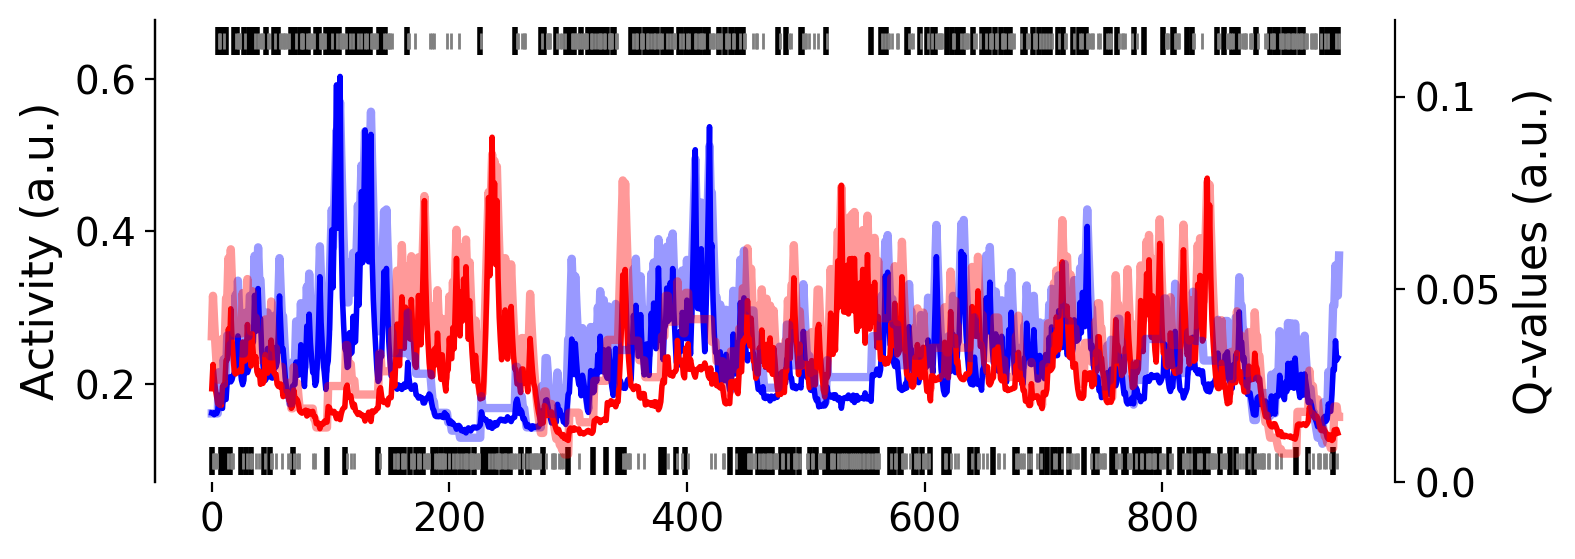

In [35]:

fig = plt.figure(figsize=(8, 3), dpi=200)
ax = fig.add_subplot(111)

p_reward = p_rw[trial_start:-1]
for l in range(p_rw[trial_start:-1].shape[0]):
    if np.isnan(p_rw[trial_start:-1][l]):
        p_reward[l] = p_ch[trial_start:-1][l]

#ax.plot(p_reward, 'g', lw = 1.5)
ax.set_xticks([])
ax.set_yticks([0, 1])
ax.set_yticklabels([0, 1], fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax2 = ax.twinx()

ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.plot(q_stim[0][trial_start:-1], color = 'b', lw = 3, alpha = .4)
ax2.plot(q_stim[1][trial_start:-1], color = 'r', lw = 3, alpha = .4)
ax2.set_ylabel('Q-values (a.u.)', fontsize=16)
ax2.set_ylim([0.0, 0.12])
ax2.set_yticklabels([0.0,0.05, 0.1], fontsize=14)
ax2.set_yticks([0.0,0.05, 0.1])
ax2.set_yticklabels([0.0,0.05, 0.1], fontsize=14)


ax.plot(rates_pfc_syn[trial_start:-1,0], color = 'b', lw = 2)
ax.plot(rates_pfc_syn[trial_start:-1,1], color = 'r', lw = 2)

ax.set_ylabel('Activity (a.u.)', fontsize=16)
ax.set_xticks([0, 200, 400, 600, 800])
ax.set_xticklabels([0, 200, 400, 600, 800], fontsize=14)
ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_yticklabels([0.2, 0.4, 0.6, 0.8], fontsize=14)

ax.plot(np.nonzero(rewarded_trials_l_ch)[0], choice_history_ch[rewarded_trials_l_ch] - .35, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(rewarded_trials_r_ch)[0], (choice_history_ch[rewarded_trials_r_ch] + 1)+.1, '|', color='black', markersize=10, markeredgewidth=2)
ax.plot(np.nonzero(unrewarded_trials_l_ch)[0], (choice_history_ch[unrewarded_trials_l_ch] + 1)/2 - .35,'|', color='gray', markersize=6, markeredgewidth=1)
ax.plot(np.nonzero(unrewarded_trials_r_ch)[0], (choice_history_ch[unrewarded_trials_r_ch] +1)/2 +.1,'|', color='gray', markersize=6, markeredgewidth=1)

plt.savefig('figures/synaptic_model/rate_vs_choice.pdf', bbox_inches='tight', transparent = True)

[Text(0, 0.0, '0'), Text(0, 0.5, '0.5'), Text(0, 1.0, '1')]

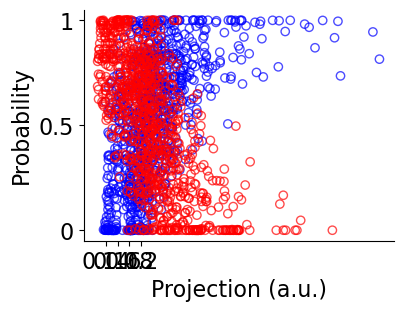

In [119]:

alpha = .7
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(rates_pfc_syn[trial_start:-1,0], p_ch[trial_start:-1], facecolor = 'None', edgecolor = 'b', alpha = alpha)
ax.scatter(rates_pfc_syn[trial_start:-1,1], p_ch[trial_start:-1],facecolor = 'None', edgecolor = 'r', alpha = alpha)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Projection (a.u.)', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)

ax.set_xticks([.14, .16,.18, .2])
ax.set_xticklabels([.14, .16,.18, .2], fontsize = 16)
ax.set_yticks([0, .5, 1.])
ax.set_yticklabels([0, .5, 1], fontsize = 16)

#plt.savefig('figures/paper/fig5/rate_vs_probchoice.pdf', bbox_inches='tight', transparent = True)

[Text(0, 0.0, '0'), Text(0, 1.0, '1'), Text(0, 2.0, '2')]

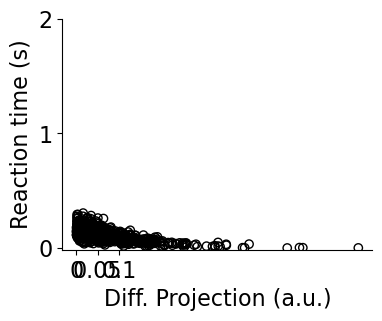

In [26]:

ovs_diff = np.abs(rates_pfc_syn[trial_start:1000, 0] - rates_pfc_syn[trial_start:1000, 1])

fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
ax.scatter(ovs_diff, reaction_times_syn[trial_start:1000,0] * .001, facecolor = 'None', edgecolor = 'k')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Diff. Projection (a.u.)', fontsize=16)
ax.set_ylabel('Reaction time (s)', fontsize=16)
ax.set_xticks([0,.05, .1])
ax.set_xticklabels([0, .05, .1], fontsize = 16)
ax.set_yticks([0, 1., 2])
ax.set_yticklabels([0, 1, 2], fontsize = 16)
#plt.savefig('figures/paper/fig5/reaction_time.pdf', bbox_inches='tight', transparent = True)

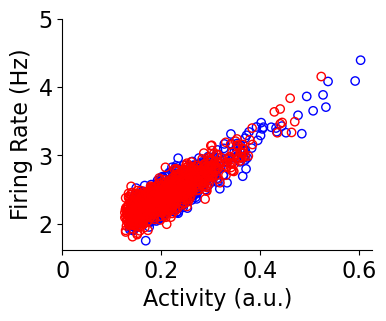

In [120]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)


ax.scatter(rates_pfc_syn[:, 0], rates_ww_syn[:,0],  facecolor = 'None', edgecolor = 'b')
ax.scatter(rates_pfc_syn[:, 1], rates_ww_syn[:,1],  facecolor = 'None', edgecolor = 'r')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylabel('Firing Rate (Hz)', fontsize=16)
ax.set_xlabel('Activity (a.u.)', fontsize=16)
ax.set_yticks([2,3,4, 5 ])
ax.set_yticklabels([2, 3, 4, 5], fontsize = 16)
ax.set_xticks([0, 0.2,.4, .6])
ax.set_xticklabels([0, 0.2,.4, .6], fontsize = 16)
#plt.savefig('figures/paper/fig5/overlap_vs_firing_rate_ww.pdf', bbox_inches='tight', transparent = True)

plt.savefig('figures/synaptic_model/firing_rate_vs_firing_rate_ww.pdf', bbox_inches='tight', transparent = True)

In [28]:
rates_ww_syn

array([[2.78490791, 2.66151449],
       [2.62753299, 2.71300063],
       [2.4856404 , 3.0054158 ],
       ...,
       [3.02267531, 2.91771681],
       [3.18150833, 2.94328254],
       [3.14240233, 2.86340171]])